In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [2]:
df = pd.read_csv('conjunto_de_datos_tmodulo_enut_2019.csv',encoding='latin-1')
df_nuevo = df[['EDAD_V','SEXO','NIV','P5_1','P5_3_1','P5_3_2','P5_3_3','P5_3_4','P5_6_6','P5_7','P5_7A']]
len(df_nuevo)

71404

In [3]:
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].replace({np.nan: '0'})
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({np.nan: '0'})
df_nuevo['P5_7'] = df_nuevo['P5_7'].replace({'99999': '0'})
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].replace({np.nan: '-1'})
df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].astype(int)
df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].astype(int)
df_nuevo['P5_3_3'] = df_nuevo['P5_3_3'].astype(int)
df_nuevo['P5_3_4'] = df_nuevo['P5_3_4'].astype(int)
df_nuevo['P5_7'] = df_nuevo['P5_7'].astype(float)
df_nuevo['P5_7A'] = df_nuevo['P5_7A'].astype(int)
df_nuevo['tot_horas'] = df_nuevo['P5_3_1'] + df_nuevo['P5_3_3']
df_nuevo['tot_minutos'] = df_nuevo['P5_3_2'] + df_nuevo['P5_3_4']
df_nuevo['tot_horas'] = df_nuevo['tot_horas'] + (df_nuevo['tot_minutos']/60)
df_nuevo

C:\Users\Miguel\AppData\Local\Temp/ipykernel_22668/2879524589.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_1'] = df_nuevo['P5_3_1'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_22668/2879524589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['P5_3_2'] = df_nuevo['P5_3_2'].replace({np.nan: '0'})
C:\Users\Miguel\AppData\Local\Temp/ipykernel_22668/2879524589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
0,88,2,2,2,0,0,0,0,NaN,0.0,-1,0.0,0
1,64,2,2,2,0,0,0,0,NaN,0.0,-1,0.0,0
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
4,22,2,8,1,22,0,18,0,1.0,99999.0,-1,40.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71399,54,2,2,2,0,0,0,0,NaN,0.0,-1,0.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [4]:
df_nuevo = df_nuevo.loc[df_nuevo['P5_7'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['P5_7A'] > 0]
df_nuevo = df_nuevo.loc[df_nuevo['EDAD_V'] >= 15]
df_nuevo = df_nuevo.loc[df_nuevo['P5_1'] == 1]
df_nuevo

,EDAD_V,SEXO,NIV,P5_1,P5_3_1,P5_3_2,P5_3_3,P5_3_4,P5_6_6,P5_7,P5_7A,tot_horas,tot_minutos
2,30,1,6,1,40,0,20,0,1.0,8300.0,3,60.0,0
3,25,1,3,1,55,0,0,0,1.0,4000.0,2,55.0,0
5,48,2,7,1,40,0,5,0,2.0,6000.0,3,45.0,0
6,26,1,8,1,40,0,0,0,2.0,8000.0,3,40.0,0
9,50,1,2,1,55,0,0,0,2.0,900.0,1,55.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71397,44,2,3,1,25,0,0,0,2.0,400.0,1,25.0,0
71400,31,1,8,1,60,0,24,0,1.0,15000.0,3,84.0,0
71401,23,2,6,1,40,0,8,0,2.0,2400.0,1,48.0,0
71402,27,1,6,1,30,0,5,0,2.0,1800.0,1,35.0,0


In [5]:
def agregaColFrecPago(df):
    res = []
    for x in df:
        if x == 1:
            res.append(48)
        else:
            if x == 2:
                res.append(21)
            else:
                if x == 3:
                    res.append(10)
                else:
                    res.append(1)
    
    return res
x = agregaColFrecPago(df_nuevo['P5_7A'])
df_nuevo['semanal'] = ((x * df_nuevo['P5_7'])/48)
df_nuevo['ganancia_hora'] = df_nuevo['semanal']/df_nuevo['tot_horas']
df_limitado = df_nuevo.loc[df_nuevo['ganancia_hora'] <= 500]
df_limitado = df_limitado.loc[df_limitado['tot_horas'] <= 90]

In [54]:
def grupos(df,minimo,maximo,num_grupos):
    minimo = minimo - 1
    maximo = maximo + 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    res = []
    for x in df:
        y = x - minimo
        y = int(y/tam_grupo)
        res.append(y)
    return res

def imprimeGrupo(minimo,maximo,num_grupos):
    minimo = minimo - 1
    maximo = maximo + 1
    dif = maximo - minimo
    tam_grupo = dif/num_grupos
    for i in range(num_grupos):
        st = 'grupo '
        x = minimo + i * tam_grupo
        y = minimo + (i + 1) * tam_grupo
        print('grupo ' + str(i) + ': (' + str(x) + ',' + str(y) +']')
        
def s2df(df):
    
    n = len(df)
    media = np.mean(df)
    s2 = df - media
    s2 = np.dot(s2,s2)
    s2 = s2 / (n-1)
    
    return s2

def intervaloDeConfVarDesc(df,alfa):
    
    res = []
    n = len(df)
    grados_de_libertad = n - 1
    media = np.mean(df)
    s2 = s2df(df)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    sn = s2 / n
    sn = pow(sn,1/2)
    res.append((media - sn * res_t))
    res.append((media + sn * res_t))
    
    return res

def intervaloDeConfDifMedias(x,alfa):
    
    res = []
    df_1 = x[0]
    df_2 = x[1]
    n1 = len(df_1)
    n2 = len(df_2)
    grados_de_libertad = n1 + n2 - 2
    media1 = np.mean(df_1)
    media2 = np.mean(df_2)
    dif = media1 - media2
    s21 = s2df(df_1)
    s22 = s2df(df_2)
    s1 = pow(s21,1/2)
    s2 = pow(s22,1/2)
    s2p = (((n1-1) * s21) + ((n2-1) * s22))/grados_de_libertad
    sp = pow(s2p,1/2)
    rn = (1/n1) + (1/n2)
    rn = pow(rn,1/2)
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    res.append((dif - res_t * sp * rn))
    res.append((dif + res_t * sp * rn))
    
    return res

def arrInterConfianza(metodo,arr,alfa):
    res = []
    for x in arr:
        
        res.append(metodo(x,alfa))
        
    return res

def pruebaDeHipotesisInferior(h0,vec,alfa):
    
    df_0 = vec[0]
    df_1 = vec[1]
    
    media_0 = np.mean(df_0)
    media_1 = np.mean(df_1)
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    dif = media_0 - media_1
    grados_de_libertad = n0 - n1 - 2
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    t_res = t.ppf(alfa, df=grados_de_libertad)
    
    c = (t_res * nr * sp) + h0
    
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    
    return c,dif,c>dif

def pruebaDeHipotesisSuperior(h0,vec,alfa):
    
    df_0 = vec[0]
    df_1 = vec[1]
    
    media_0 = np.mean(df_0)
    media_1 = np.mean(df_1)
    
    n0 = len(df_0)
    n1 = len(df_1)
    
    s2_0 = s2df(df_0)
    s2_1 = s2df(df_1)
    
    dif = media_0 - media_1
    grados_de_libertad = n0 - n1 - 2
    
    sp2 = ((n0-1) * s2_0 + (n1-1) * s2_1)/grados_de_libertad
    sp = pow(sp2,1/2)
    
    nr2 = (1/n0) + (1/n1)
    nr = pow(nr2,1/2)
    
    t_res = t.ppf(1-alfa, df=grados_de_libertad)
    
    c = (t_res * nr * sp) + h0
    
    res_t = t.ppf(1-alfa/2, df=grados_de_libertad)
    
    return c,dif,c<dif

def arrEstimador(metodo,vec,col):
    resp = []
    for x in vec:
        resp.append(metodo(x[col]))
    return resp

def pow_n(a):
    res = pow(a,1/2)
    
    return res

def aceptar_o_rechazar_h0(b, alfa):
    
    if b :
        print('Hay evidencia suficiente para rechazar h0, con una confiabilidad del ' + str(1-alfa))
        
    else:
        print('No hay evidencia suficiente para rechazar h0, con una confiabilidad del ' + str(1-alfa))

### Agregar grupos de horas e ingreso por hora

In [7]:
minimo = min(df_limitado['tot_horas'])
maximo = max(df_limitado['tot_horas'])
num_grupo = 15
df_limitado['grupo_horas'] = grupos(df_limitado['tot_horas'],minimo,maximo,num_grupo)
print('grupos de horas')
imprimeGrupo(minimo,maximo,num_grupo)
print('-------------------------------------------------------------------')
minimo = min(df_limitado['ganancia_hora'])
maximo = max(df_limitado['ganancia_hora'])
num_grupo = 40
df_limitado['grupo_ganancia_hora'] = grupos(df_limitado['ganancia_hora'],minimo,maximo,num_grupo)
print('grupos de ganacia por hora')
imprimeGrupo(minimo,maximo,num_grupo)

grupos de horas
grupo 0: (0.0,6.066666666666666]
grupo 1: (6.066666666666666,12.133333333333333]
grupo 2: (12.133333333333333,18.2]
grupo 3: (18.2,24.266666666666666]
grupo 4: (24.266666666666666,30.333333333333332]
grupo 5: (30.333333333333332,36.4]
grupo 6: (36.4,42.46666666666667]
grupo 7: (42.46666666666667,48.53333333333333]
grupo 8: (48.53333333333333,54.599999999999994]
grupo 9: (54.599999999999994,60.666666666666664]
grupo 10: (60.666666666666664,66.73333333333333]
grupo 11: (66.73333333333333,72.8]
grupo 12: (72.8,78.86666666666666]
grupo 13: (78.86666666666666,84.93333333333334]
grupo 14: (84.93333333333334,91.0]
-------------------------------------------------------------------
grupos de ganacia por hora
grupo 0: (-0.9479166666666666,11.60078125]
grupo 1: (11.60078125,24.149479166666666]
grupo 2: (24.149479166666666,36.698177083333334]
grupo 3: (36.698177083333334,49.246875]
grupo 4: (49.246875,61.79557291666667]
grupo 5: (61.79557291666667,74.34427083333333]
grupo 6: (74.3

# DF a utilizar para las graficas

Separar la poblacion en niveles educativos (NIV) \
0 es sin educación \
1-3 básica \
4-6 media \
7-8 superior 

In [8]:
df_nula = df_limitado.loc[df_limitado['NIV'] == 0]
df_basica = df_limitado.loc[df_limitado['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_limitado.loc[df_limitado['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_limitado.loc[df_limitado['NIV'] > 7]

### Licenciatura vs maestria doctorado

In [9]:
df_licenciatura = df_superior.loc[df_superior['NIV'] == 8]
df_maestria_doctorado = df_superior.loc[df_superior['NIV'] == 9]

### Hombres vs mujeres

In [10]:
df_hombres = df_limitado.loc[df_limitado['SEXO'] == 1]
df_mujeres = df_limitado.loc[df_limitado['SEXO'] == 2]

### Formal vs informal

In [11]:
df_formal = df_limitado.loc[df_limitado['P5_6_6'] == 1]
df_informal = df_limitado.loc[df_limitado['P5_6_6'] == 2]

## Nivel educativo

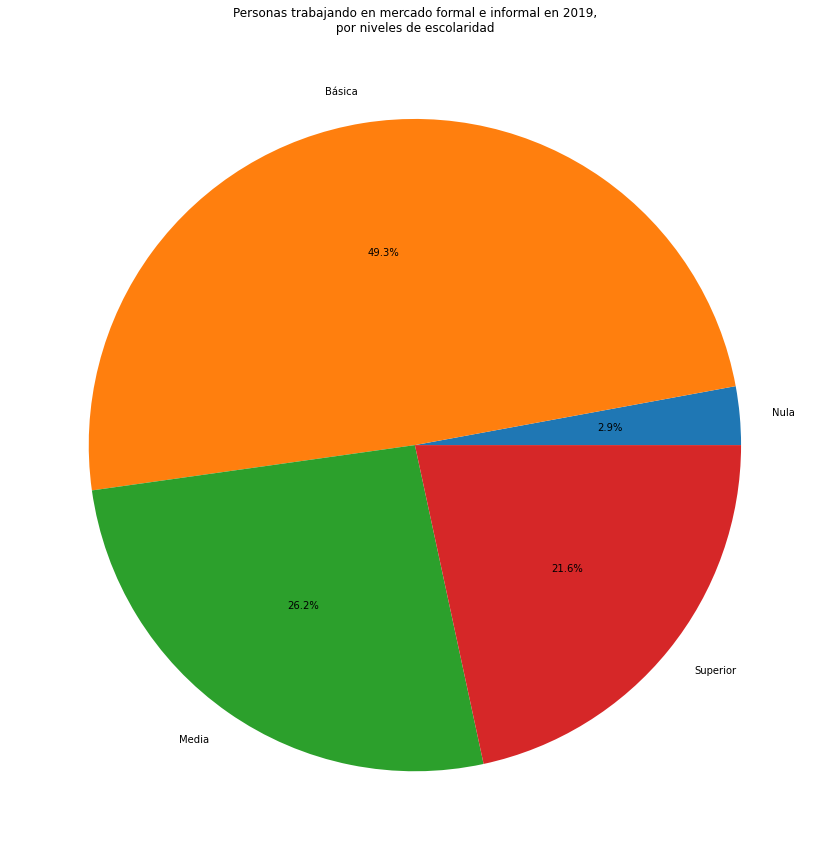

In [12]:
tot_muestra = len(df_limitado)
tot_nula = len(df_nula)
tot_basica = len(df_basica)
tot_media = len(df_media)
tot_superior = len(df_superior)

arr_pie = [tot_nula/tot_muestra,tot_basica/tot_muestra,tot_media/tot_muestra,tot_superior/tot_muestra]
mylabels = ['Nula','Básica','Media','Superior']
plt.figure(figsize=(15,15))
plt.title("Personas trabajando en mercado formal e informal en 2019,\n por niveles de escolaridad ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

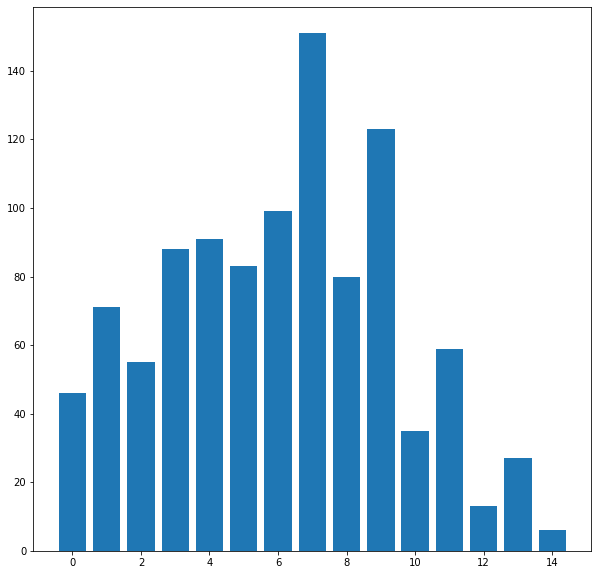

In [13]:
y = df_nula['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.figure(figsize=(10,10))
plt.bar(x,y)

<BarContainer object of 20 artists>

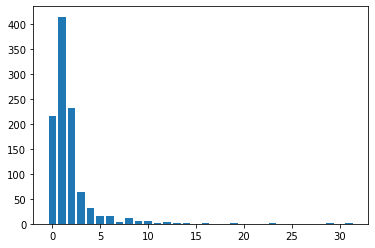

In [14]:
y = df_nula['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

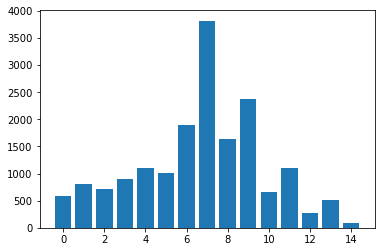

In [15]:
y = df_basica['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 36 artists>

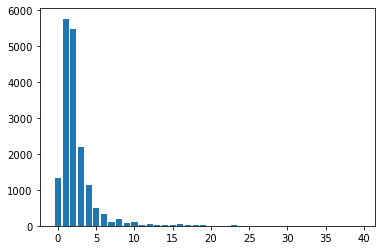

In [16]:
y = df_basica['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

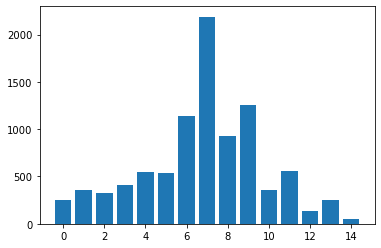

In [17]:
y = df_media['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 36 artists>

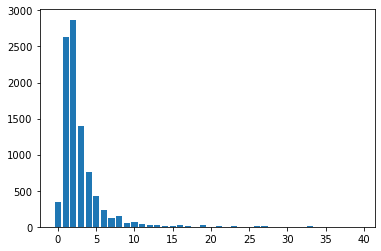

In [18]:
y = df_media['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

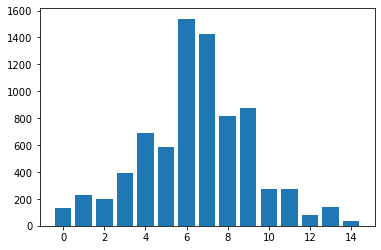

In [19]:
y = df_superior['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 40 artists>

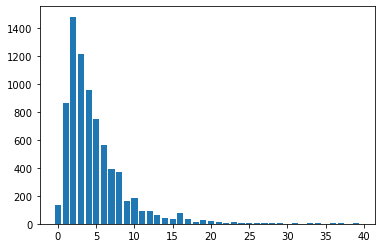

In [20]:
y = df_superior['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

## Licenciatura vs maestria y doctorado

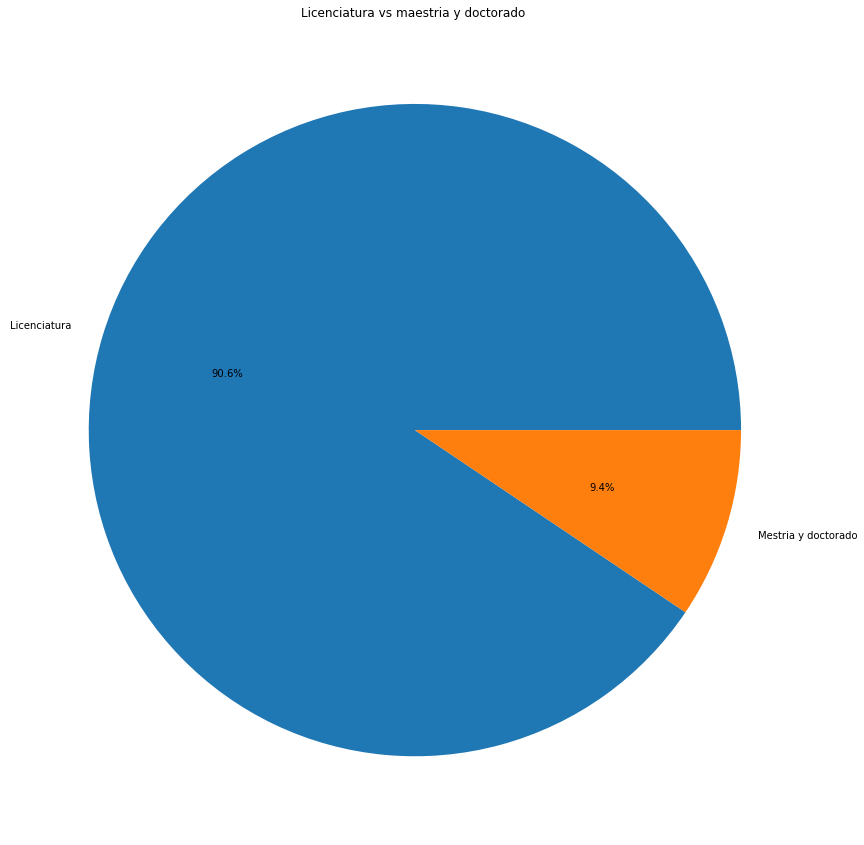

In [21]:
tot_licenciatura = len(df_licenciatura)
tot_mestria_doctorado = len(df_maestria_doctorado)
arr_pie = [tot_licenciatura/tot_superior,tot_mestria_doctorado/tot_superior]
mylabels = ['Licenciatura','Mestria y doctorado']

plt.figure(figsize=(15,15))
plt.title("Licenciatura vs maestria y doctorado ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

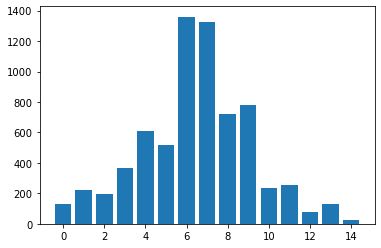

In [22]:
y = df_licenciatura['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 39 artists>

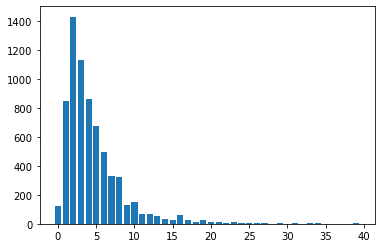

In [23]:
y = df_licenciatura['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

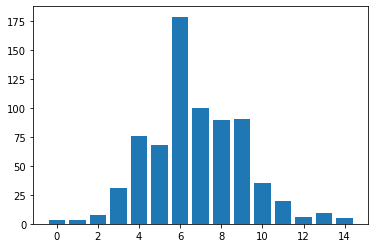

In [24]:
y = df_maestria_doctorado['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 34 artists>

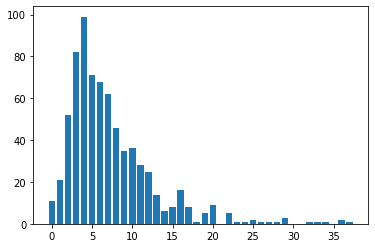

In [25]:
y = df_maestria_doctorado['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

## Hombres vs mujeres

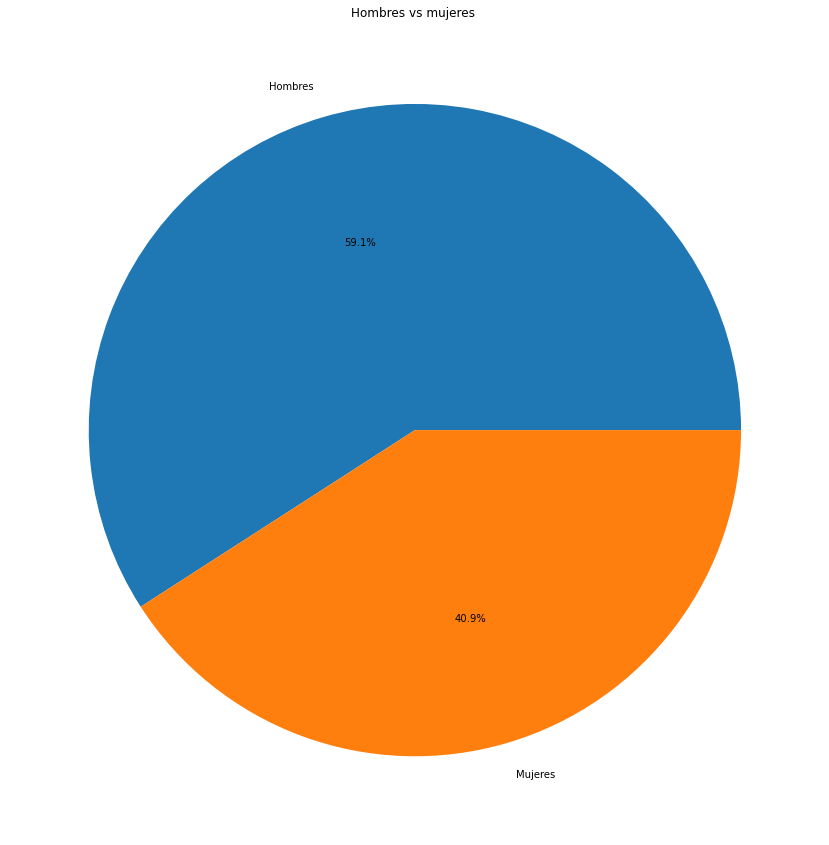

In [26]:
tot_hombres = len(df_hombres)
tot_mujeres = len(df_mujeres)
arr_pie = [tot_hombres/tot_muestra,tot_mujeres/tot_muestra]
mylabels = ['Hombres','Mujeres']

plt.figure(figsize=(15,15))
plt.title("Hombres vs mujeres ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

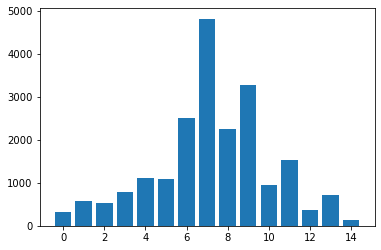

In [27]:
y = df_hombres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 40 artists>

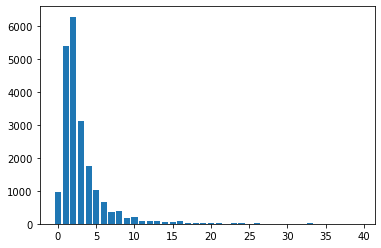

In [28]:
y = df_hombres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

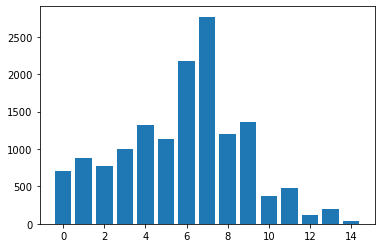

In [29]:
y = df_mujeres['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 36 artists>

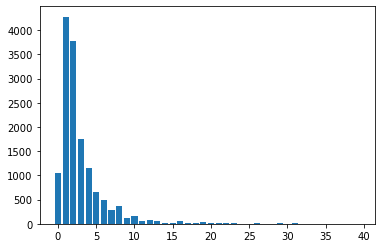

In [30]:
y = df_mujeres['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

## Formal vs informal

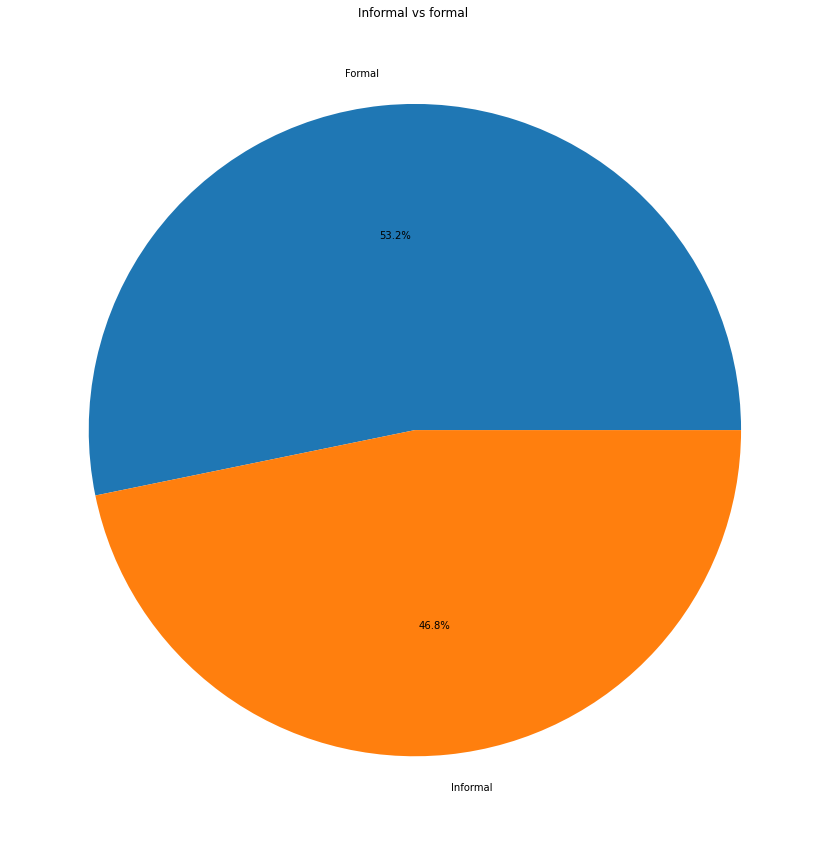

In [31]:
tot_formal = len(df_formal)
tot_informal = len(df_informal)
tot_formal_informal = tot_formal + tot_informal
arr_pie = [tot_formal/tot_formal_informal,tot_informal/tot_formal_informal]
mylabels = ['Formal','Informal']

plt.figure(figsize=(15,15))
plt.title("Informal vs formal ")
plt.pie(arr_pie,labels = mylabels, autopct='%1.1f%%')
plt.show()

<BarContainer object of 15 artists>

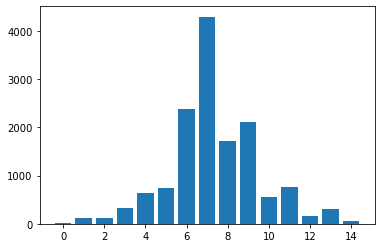

In [32]:
y = df_formal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 38 artists>

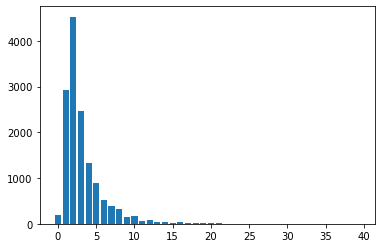

In [33]:
y = df_formal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 15 artists>

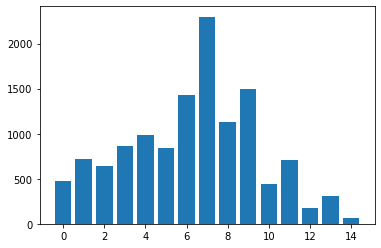

In [34]:
y = df_informal['grupo_horas'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

<BarContainer object of 33 artists>

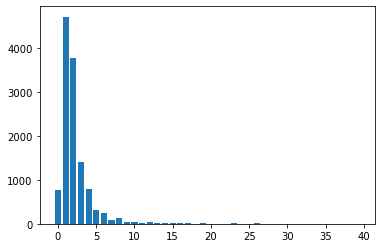

In [35]:
y = df_informal['grupo_ganancia_hora'].value_counts()
x = y.keys()      
y = y.values
plt.bar(x,y)

# Intervalos de confianza

## Nivel educativo

In [36]:
df_nula = df_nuevo.loc[df_nuevo['NIV'] == 0]
df_basica = df_nuevo.loc[df_nuevo['NIV'] > 0]
df_basica = df_basica.loc[df_basica['NIV'] < 4]
df_media = df_nuevo.loc[df_nuevo['NIV'] > 3]
df_media = df_media.loc[df_media['NIV'] < 8]
df_superior = df_nuevo.loc[df_nuevo['NIV'] > 7]

alfa = .05
arr_horas = [df_nula['tot_horas'],df_basica['tot_horas'],df_media['tot_horas'],df_superior['tot_horas']]
arr_pago_hora = [df_nula['ganancia_hora'],df_basica['ganancia_hora'],df_media['ganancia_hora'],df_superior['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con educacion nula : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con educacion básica : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para horas trabajadas con educacion media : ' + str(arr_inter_horas[2]))
print('Intervalo de confinza para horas trabajadas con educacion superior : ' + str(arr_inter_horas[3]))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con educacion nula : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con educacion básica : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para el ingreso por hora con educacion media : ' + str(arr_inter_pago_hora[2]))
print('Intervalo de confinza para el ingreso por hora con educacion superior : ' + str(arr_inter_pago_hora[3]))


Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas con educacion nula : [40.59472478438176, 43.257222034231724]
Intervalo de confinza para horas trabajadas con educacion básica : [45.09101414914455, 45.68460685005298]
Intervalo de confinza para horas trabajadas con educacion media : [45.657908872356295, 46.434950280591515]
Intervalo de confinza para horas trabajadas con educacion superior : [43.13106092736935, 43.88867360485072]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora con educacion nula : [24.994636651029342, 28.699064617351613]
Intervalo de confinza para el ingreso por hora con educacion básica : [34.2935109322123, 35.6392558888044]
Intervalo de confinza para el ingreso por hora con educacion media : [40.33975189057914, 42.361395076661026]
Intervalo de confinza para el ingres

## Licenciatura vs maestria y doctorado

In [37]:
df_licenciatura = df_superior.loc[df_superior['NIV'] == 8]
df_maestria_doctorado = df_superior.loc[df_superior['NIV'] == 9]

alfa = .05
arr_horas = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
arr_pago_hora = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_licenciatura['tot_horas'],df_maestria_doctorado['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_licenciatura['ganancia_hora'],df_maestria_doctorado['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas con licenciatura : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas con maestria y doctorado : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora con licenciatura : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora con maestria y doctorado : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))


Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas con licenciatura : [42.97511538781393, 43.78016904969495]
Intervalo de confinza para horas trabajadas con maestria y doctorado : [43.686060065491084, 45.8664308765379]
Intervalo de confinza para diferencia de horas promedio trabajadas : [-2.6930255107175247, -0.10418099380258039]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora con licenciatura : [24.994636651029342, 28.699064617351613]
Intervalo de confinza para el ingreso por hora con maestria y doctorado : [34.2935109322123, 35.6392558888044]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-43.51077712152144, -23.746145188387743]


## Hombre vs mujeres

In [38]:
df_hombres = df_nuevo.loc[df_nuevo['SEXO'] == 1]
df_mujeres = df_nuevo.loc[df_nuevo['SEXO'] == 2]

alfa = .05
arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de los hombres : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las mujeres  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de los hombres : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las mujeres : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas de los hombres : [48.65127484318559, 49.153767108457615]
Intervalo de confinza para horas trabajadas de las mujeres  : [39.116859790923534, 39.73045438062437]
Intervalo de confinza para diferencia de horas promedio trabajadas : [9.083017005684301, 9.874710774410996]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora de los hombres : [43.41732006648844, 45.68884283591201]
Intervalo de confinza para el ingreso por hora de las mujeres : [42.2548932256163, 44.087553647011404]
Intervalo de confinza para diferencia de ingreso por hora promedio : [-0.18715747398890992, 2.950873503761662]


## Formal vs informal

In [39]:
df_formal = df_nuevo.loc[df_nuevo['P5_6_6'] == 1]
df_informal = df_nuevo.loc[df_nuevo['P5_6_6'] == 2]

alfa = .05
arr_horas = [df_formal['tot_horas'],df_informal['tot_horas']]
arr_pago_hora = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
arr_inter_horas = arrInterConfianza(intervaloDeConfVarDesc,arr_horas,alfa)
arr_inter_pago_hora = arrInterConfianza(intervaloDeConfVarDesc,arr_pago_hora,alfa)

x = [df_formal['tot_horas'],df_informal['tot_horas']]
dif_media_horas = intervaloDeConfDifMedias(x,alfa)

x = [df_formal['ganancia_hora'],df_informal['ganancia_hora']]
dif_media_ganancia = intervaloDeConfDifMedias(x,alfa)

print('Intervalo de confinza para horas trabajadas con alfa del ' + str(alfa))
print('Intervalo de confinza para horas trabajadas de las personas en el sector formal : ' + str(arr_inter_horas[0]))
print('Intervalo de confinza para horas trabajadas de las personas en el sector informal  : ' + str(arr_inter_horas[1]))
print('Intervalo de confinza para diferencia de horas promedio trabajadas : ' + str(dif_media_horas))
print('-------------------------------------------------------------------------------------')
print('Intervalo de confinza para el ingreso por hora con alfa del ' + str(alfa))
print('Intervalo de confinza para el ingreso por hora de las personas en el sector formal : ' + str(arr_inter_pago_hora[0]))
print('Intervalo de confinza para el ingreso por hora de las personas en el sector informal : ' + str(arr_inter_pago_hora[1]))
print('Intervalo de confinza para diferencia de ingreso por hora promedio : ' + str(dif_media_ganancia))

Intervalo de confinza para horas trabajadas con alfa del 0.05
Intervalo de confinza para horas trabajadas de las personas en el sector formal : [48.99971274424146, 49.48095634966524]
Intervalo de confinza para horas trabajadas de las personas en el sector informal  : [42.488172340509614, 43.19777798628777]
Intervalo de confinza para diferencia de horas promedio trabajadas : [5.977422935998887, 6.817295831110429]
-------------------------------------------------------------------------------------
Intervalo de confinza para el ingreso por hora con alfa del 0.05
Intervalo de confinza para el ingreso por hora de las personas en el sector formal : [46.31042520643466, 49.32579368036677]
Intervalo de confinza para el ingreso por hora de las personas en el sector informal : [33.05289232819531, 34.366391075507764]
Intervalo de confinza para diferencia de ingreso por hora promedio : [12.384281395602809, 15.832654087495545]


# Graficas desv_estd - media

## Horas trabajadas promedio

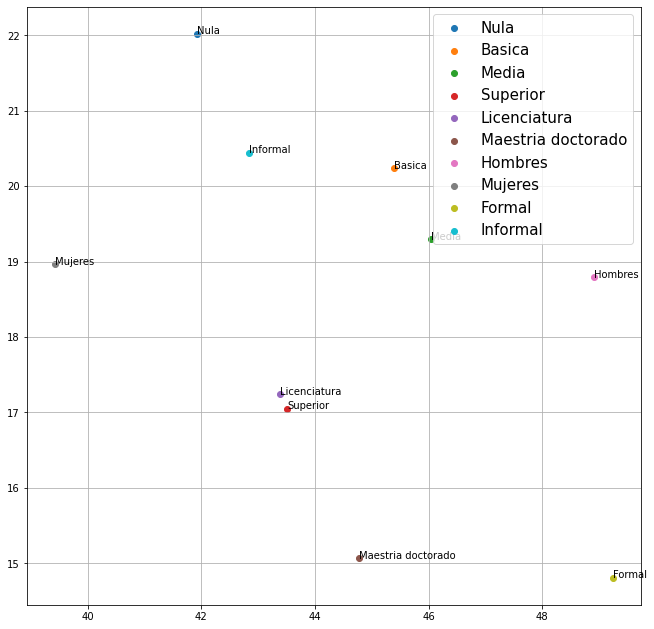

In [40]:
vec = [df_nula,df_basica,df_media,df_superior,df_licenciatura,df_maestria_doctorado,df_hombres,df_mujeres,df_formal,df_informal]

x_s2_horas = arrEstimador(s2df,vec,'tot_horas')
x_s_horas = map(pow_n,x_s2_horas)
x_s_horas = list(x_s_horas)
x_media_horas = arrEstimador(np.mean,vec,'tot_horas')

legends = ['Nula','Basica','Media','Superior','Licenciatura','Maestria doctorado','Hombres','Mujeres','Formal','Informal']
plt.figure(figsize=(11,11))
for i in range(len(x_s2_horas)):
    plt.scatter(x_media_horas[i],x_s_horas[i])
    plt.annotate(legends[i], ( x_media_horas[i],x_s_horas[i]))
plt.legend(legends, fontsize="15")
plt.grid(True)

## Ingreso por hora promedio

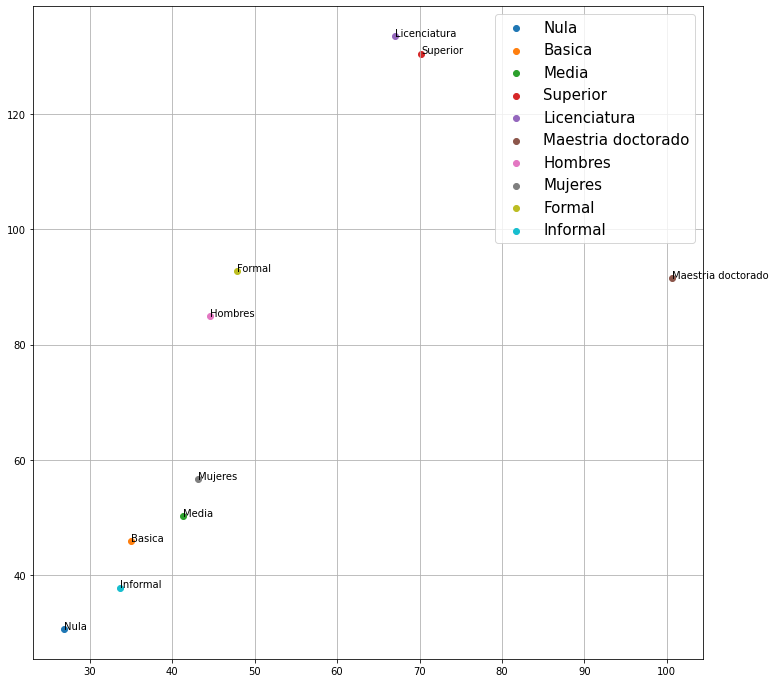

In [41]:
x_s2_ganancia = arrEstimador(s2df,vec,'ganancia_hora')
x_s_ganancia = map(pow_n,x_s2_ganancia)
x_s_ganancia = list(x_s_ganancia)
x_media_ganancia = arrEstimador(np.mean,vec,'ganancia_hora')

legends = ['Nula','Basica','Media','Superior','Licenciatura','Maestria doctorado','Hombres','Mujeres','Formal','Informal']
plt.figure(figsize=(12,12))
for i in range(len(x_s2_horas)):
    plt.scatter(x_media_ganancia[i],x_s_ganancia[i],label = legends[i])
    plt.annotate(legends[i], ( x_media_ganancia[i],x_s_ganancia[i]))
plt.legend(legends, fontsize="15")
plt.grid(True)

# Pruebas de hipotesis

## Licenciatura vs maestria doctorado

## Hombres vs mujeres

Probar si el salario promedio de los hombres por hora es igual que el salario promedio por hora de las mujeres \
h0: media_ingreso_hora_hombres = media_ingreso_hora_mujeres \
ha: media_ingreso_hora_hombres > media_ingreso_hora_mujeres

In [42]:
alfa = 0.001
h0 = 0

arr_pago_hora = [df_hombres['ganancia_hora'],df_mujeres['ganancia_hora']]
res = pruebaDeHipotesisSuperior(h0,arr_pago_hora,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 5.7039351507789675
diferencia de medias: 1.381858014886376
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


Probar si las horas trabajadas en promedio de los hombres es igual a las hora trabajadas de las mujeres \
h0: media_horas_hombres = media_horas_mujeres \
ha: media_horas_hombres > media_horas_mujeres

In [52]:
alfa = 0.001
h0 = 0

arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
res = pruebaDeHipotesisSuperior(h0,arr_horas,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 1.4390456780416823
diferencia de medias: 9.478863890047649
Hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999


In [59]:
Probar si las horas trabajadas en promedio de los hombres es 9 horas mayor que  de las mujeres \
h0: media_horas_hombres - media_horas_mujeres = 9 \
ha: media_horas_hombres - media_horas_mujeres < 9

SyntaxError: invalid syntax (Temp/ipykernel_22668/2477355597.py, line 1)

In [58]:
alfa = 0.001
h0 = 9

arr_horas = [df_hombres['tot_horas'],df_mujeres['tot_horas']]
res = pruebaDeHipotesisInferior(h0,arr_horas,alfa)

print('valor del punto crítico: ' + str(res[0]))
print('diferencia de medias: ' + str(res[1]))
aceptar_o_rechazar_h0(res[2],alfa)

valor del punto crítico: 7.5609543219583175
diferencia de medias: 9.478863890047649
No hay evidencia suficiente para rechazar h0, con una confiabilidad del 0.999
